### Final Project: Phase 1
DS5230 - Spring 2024  
Group: Michael MAssone and Nelson Farrell  
Due: 01/21/2024  


### Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import sys
from pathlib import Path
from sklearn.preprocessing import LabelEncoder



___
### File Path

In [37]:
nb_path = Path(os.getcwd())
print(nb_path)
path = str(nb_path.parent)
print(path)
figs_path = path + '/figs'
data_path= path + 'data'
src_path = path + '/src'
print(src_path)
sys.path.append(src_path)


/Users/nelsonfarrell/Documents/Northeastern/5230/final_project/DS5230-final/notebooks
/Users/nelsonfarrell/Documents/Northeastern/5230/final_project/DS5230-final
/Users/nelsonfarrell/Documents/Northeastern/5230/final_project/DS5230-final/src


___
### Functions

In [38]:

from get_data import get_date_from_source
from data_id_vector import check_for_id_matrix
from target_to_csv import target_to_csv
from design_to_csv import design_to_csv



___
### Params

___
### Load Data

In [39]:
df = get_date_from_source()

___
### Display Dataset General Information

In [40]:
df.head(10)

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280\%2FOD315_of_diluted_wines,Proline
0,b'1',13.761443,0.972960,2.191146,14.349954,106.525734,2.288580,2.584551,0.418044,1.862804,3.086808,1.169861,2.819086,850.678431
1,b'2',11.897923,1.297780,2.199666,17.478054,104.205421,2.716657,1.855066,0.318077,1.029640,9.103668,1.353718,2.780333,332.922006
2,b'3',12.659632,1.748552,2.438597,21.584696,88.079451,1.919476,0.681341,0.538078,1.327974,8.803633,0.643678,1.569951,633.531687
3,b'1',13.054828,1.817559,1.893926,15.390157,108.589893,2.662509,2.815723,0.278535,1.473812,6.386732,0.820398,3.694865,880.103325
4,b'3',11.769431,3.017528,3.013448,17.081528,86.525235,2.224963,0.846229,0.286065,1.644007,10.383464,0.734288,2.747013,475.152492
5,b'3',12.561898,1.072468,2.289096,16.178492,143.097929,1.322447,0.546074,0.363814,1.292530,1.998026,0.684318,2.427139,965.705496
6,b'2',12.323194,1.891450,2.511648,21.647538,80.719510,2.010391,1.427322,0.312309,1.218217,2.561314,0.977267,2.128190,527.409680
7,b'2',11.788026,2.489249,2.235170,20.939465,98.548638,1.101391,1.751180,0.351553,2.706945,2.013674,1.242601,2.783720,397.668447
8,b'1',14.067198,1.735992,2.297139,24.212729,137.240746,2.717540,3.294299,0.324792,2.097848,5.177485,1.336739,2.737432,1068.471128
9,b'3',13.748664,2.649201,2.873692,20.565244,114.027992,1.779626,0.745640,0.557089,0.817820,4.631893,0.929179,2.088189,554.119074


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   class                            1000000 non-null  object 
 1   Alcohol                          1000000 non-null  float64
 2   Malic_acid                       1000000 non-null  float64
 3   Ash                              1000000 non-null  float64
 4   Alcalinity_of_ash                1000000 non-null  float64
 5   Magnesium                        1000000 non-null  float64
 6   Total_phenols                    1000000 non-null  float64
 7   Flavanoids                       1000000 non-null  float64
 8   Nonflavanoid_phenols             1000000 non-null  float64
 9   Proanthocyanins                  1000000 non-null  float64
 10  Color_intensity                  1000000 non-null  float64
 11  Hue                              1000000 non-null  

___
### Check for Missing Values in Target Vector

In [42]:
#check number Nan in target vector
df['class'].isna().sum()

0

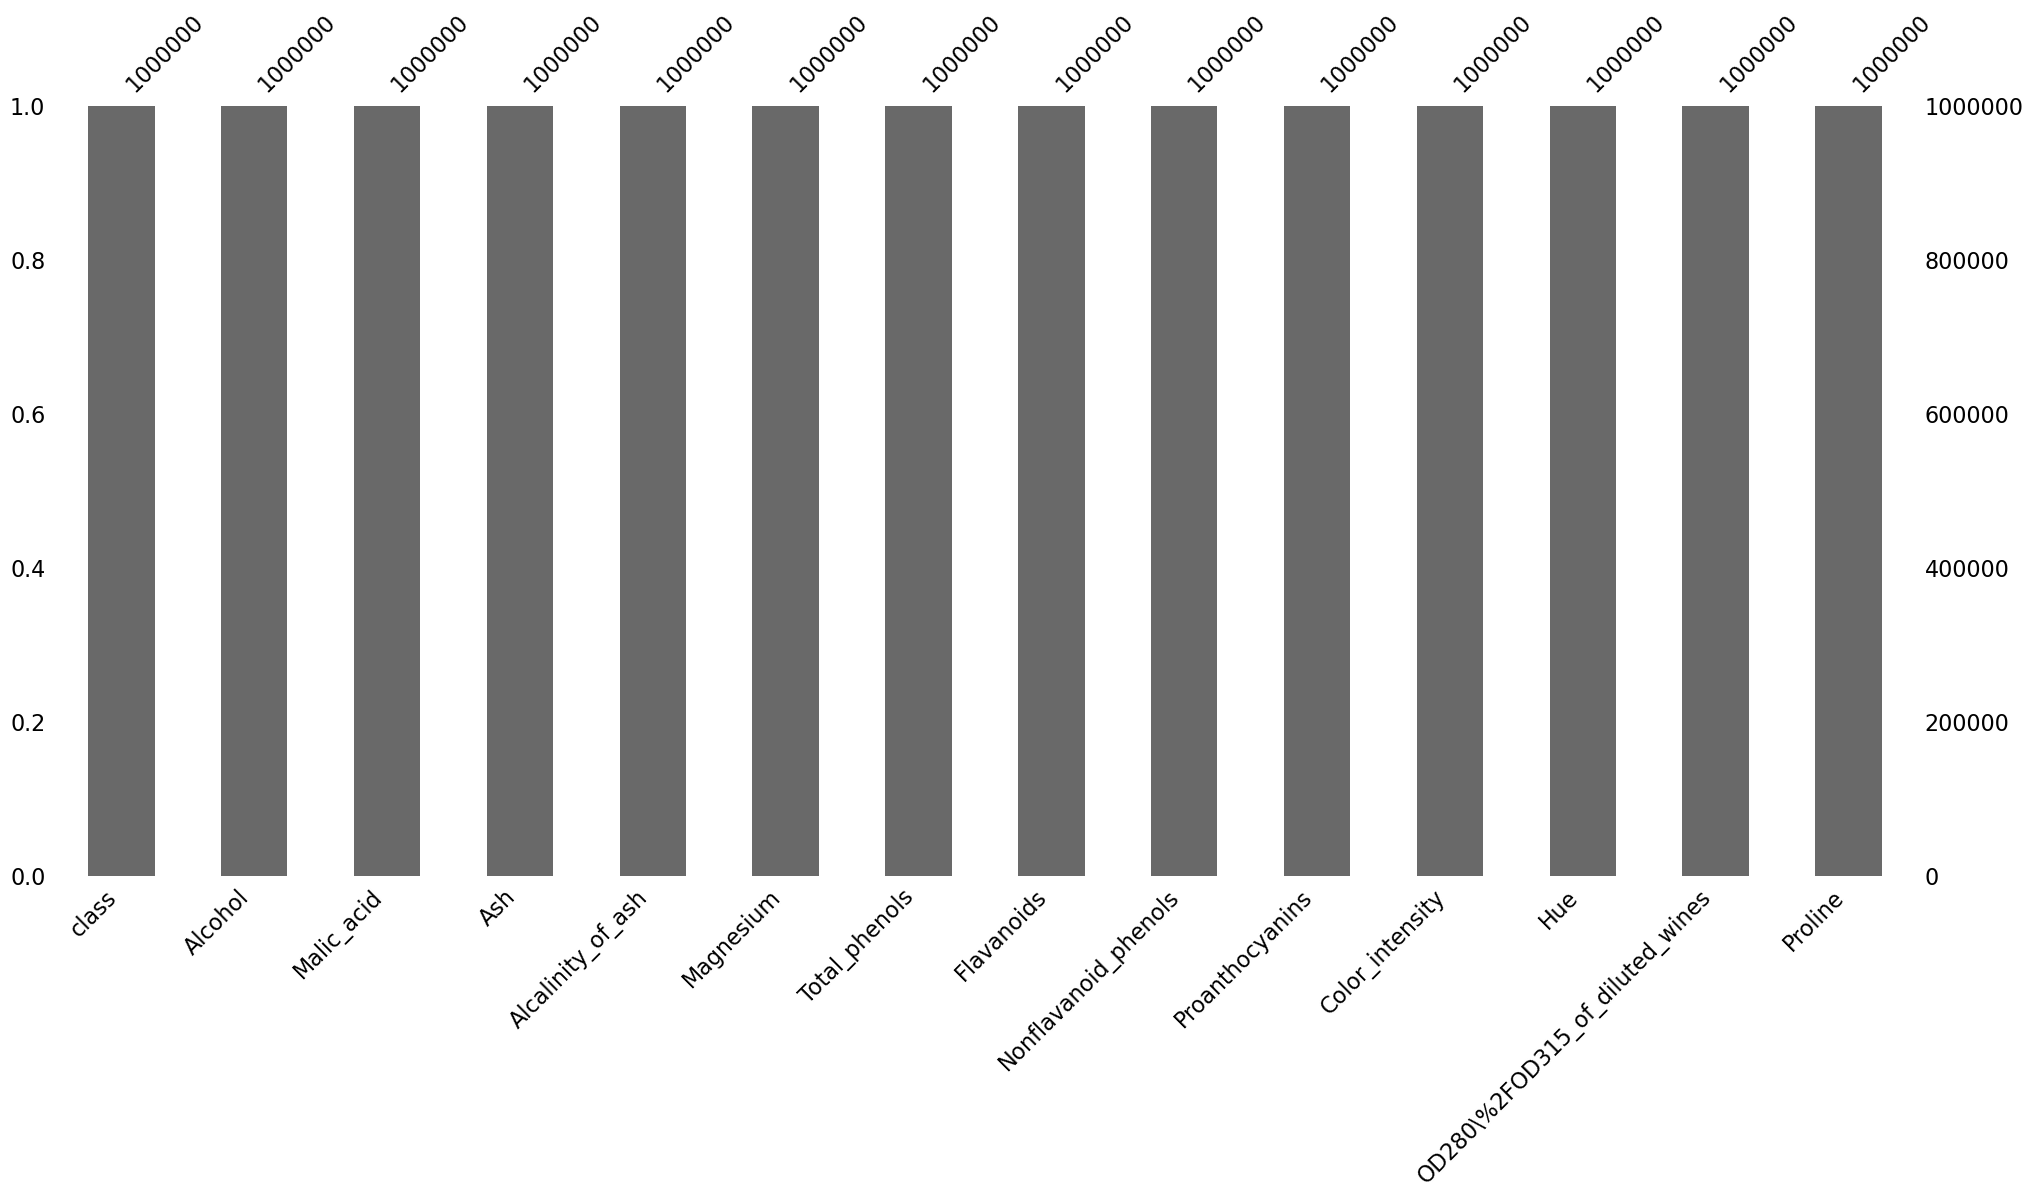

In [43]:
# display missing values
msno.bar(df);

___
### Check for ID Attribute

In [57]:
check_for_id_matrix(df)

Number of Rows: 1000000


AttributeError: 'Series' object has no attribute 'nuqniue'

___
### Add ID Attribute

In [45]:
df['id'] = range(0, df.shape[0])
print(df.id)
df.head()

0              0
1              1
2              2
3              3
4              4
           ...  
999995    999995
999996    999996
999997    999997
999998    999998
999999    999999
Name: id, Length: 1000000, dtype: int64


,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280\%2FOD315_of_diluted_wines,Proline,id
0,b'1',13.761443,0.972960,2.191146,14.349954,106.525734,2.288580,2.584551,0.418044,1.862804,3.086808,1.169861,2.819086,850.678431,0
1,b'2',11.897923,1.297780,2.199666,17.478054,104.205421,2.716657,1.855066,0.318077,1.029640,9.103668,1.353718,2.780333,332.922006,1
2,b'3',12.659632,1.748552,2.438597,21.584696,88.079451,1.919476,0.681341,0.538078,1.327974,8.803633,0.643678,1.569951,633.531687,2
3,b'1',13.054828,1.817559,1.893926,15.390157,108.589893,2.662509,2.815723,0.278535,1.473812,6.386732,0.820398,3.694865,880.103325,3
4,b'3',11.769431,3.017528,3.013448,17.081528,86.525235,2.224963,0.846229,0.286065,1.644007,10.383464,0.734288,2.747013,475.152492,4


___
### Arrange Columns

In [46]:
df.insert(0, 'id', df.pop('id'))
df.head()

,id,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280\%2FOD315_of_diluted_wines,Proline
0,0,b'1',13.761443,0.972960,2.191146,14.349954,106.525734,2.288580,2.584551,0.418044,1.862804,3.086808,1.169861,2.819086,850.678431
1,1,b'2',11.897923,1.297780,2.199666,17.478054,104.205421,2.716657,1.855066,0.318077,1.029640,9.103668,1.353718,2.780333,332.922006
2,2,b'3',12.659632,1.748552,2.438597,21.584696,88.079451,1.919476,0.681341,0.538078,1.327974,8.803633,0.643678,1.569951,633.531687
3,3,b'1',13.054828,1.817559,1.893926,15.390157,108.589893,2.662509,2.815723,0.278535,1.473812,6.386732,0.820398,3.694865,880.103325
4,4,b'3',11.769431,3.017528,3.013448,17.081528,86.525235,2.224963,0.846229,0.286065,1.644007,10.383464,0.734288,2.747013,475.152492


___
### Separate Target & Design Matrix

#### Target Dataframe:

In [47]:
target_df = df[['id', 'class']].copy()
target_df

,id,class
0,0,b'1'
1,1,b'2'
2,2,b'3'
3,3,b'1'
4,4,b'3'
...,...,...
999995,999995,b'1'
999996,999996,b'3'
999997,999997,b'3'
999998,999998,b'1'


#### Design Matrix:

In [48]:
# make list of all columns
cols = list(df.columns)

# make new list without target
design_cols = [item for item in cols if item != "class"]

# create design df
design_df = df[design_cols].copy()

# display design_df info
print(design_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1000000 non-null  int64  
 1   Alcohol                          1000000 non-null  float64
 2   Malic_acid                       1000000 non-null  float64
 3   Ash                              1000000 non-null  float64
 4   Alcalinity_of_ash                1000000 non-null  float64
 5   Magnesium                        1000000 non-null  float64
 6   Total_phenols                    1000000 non-null  float64
 7   Flavanoids                       1000000 non-null  float64
 8   Nonflavanoid_phenols             1000000 non-null  float64
 9   Proanthocyanins                  1000000 non-null  float64
 10  Color_intensity                  1000000 non-null  float64
 11  Hue                              1000000 non-null  

___
### Display the Number of Classes in the Target Vector

In [49]:
num_classes = target_df['class'].nunique()
print(f'Number of classes in target vector: {num_classes}')

Number of classes in target vector: 3


___
### Map Target Vector Strings to Numerical Values

In [50]:
# instantiate encoder
le = LabelEncoder()

# encode target column
target_df['target_encoded'] = le.fit_transform(df['class'])

# extract the precise mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# print mapping formula
print(mapping)

# extract mapped values and id
target_df = target_df[['id', 'target_encoded']]

{b'1': 0, b'2': 1, b'3': 2}


### Mapping Key:  
The mapping procedure is as follows:  
The mapping procedure is as follows:  
* b'1' $= 0$
* b'2' $= 1$
* b'3' $= 2$ 

___
### Save Target Vector and Design Matrix


___
## Design Matrix

### Determine the Size of the Design Matrix

In [51]:
# determine size of the design matrix
design_matrix_size = design_df.shape

# display
print(f'Design Matrix Size: {design_matrix_size}')

Design Matrix Size: (1000000, 14)


___
### Determine the Attribute Types of the Design Matrix

In [52]:
design_df.dtypes

id                                   int64
Alcohol                            float64
Malic_acid                         float64
Ash                                float64
Alcalinity_of_ash                  float64
Magnesium                          float64
Total_phenols                      float64
Flavanoids                         float64
Nonflavanoid_phenols               float64
Proanthocyanins                    float64
Color_intensity                    float64
Hue                                float64
OD280\%2FOD315_of_diluted_wines    float64
Proline                            float64
dtype: object

___
### Determine Missingness of Design Matrix

In [53]:
# find proportion of missing values
round(design_df.isna().sum()/design_df.shape[0], 3)

id                                 0.0
Alcohol                            0.0
Malic_acid                         0.0
Ash                                0.0
Alcalinity_of_ash                  0.0
Magnesium                          0.0
Total_phenols                      0.0
Flavanoids                         0.0
Nonflavanoid_phenols               0.0
Proanthocyanins                    0.0
Color_intensity                    0.0
Hue                                0.0
OD280\%2FOD315_of_diluted_wines    0.0
Proline                            0.0
dtype: float64

In [54]:
design_df.isna().sum()

id                                 0
Alcohol                            0
Malic_acid                         0
Ash                                0
Alcalinity_of_ash                  0
Magnesium                          0
Total_phenols                      0
Flavanoids                         0
Nonflavanoid_phenols               0
Proanthocyanins                    0
Color_intensity                    0
Hue                                0
OD280\%2FOD315_of_diluted_wines    0
Proline                            0
dtype: int64

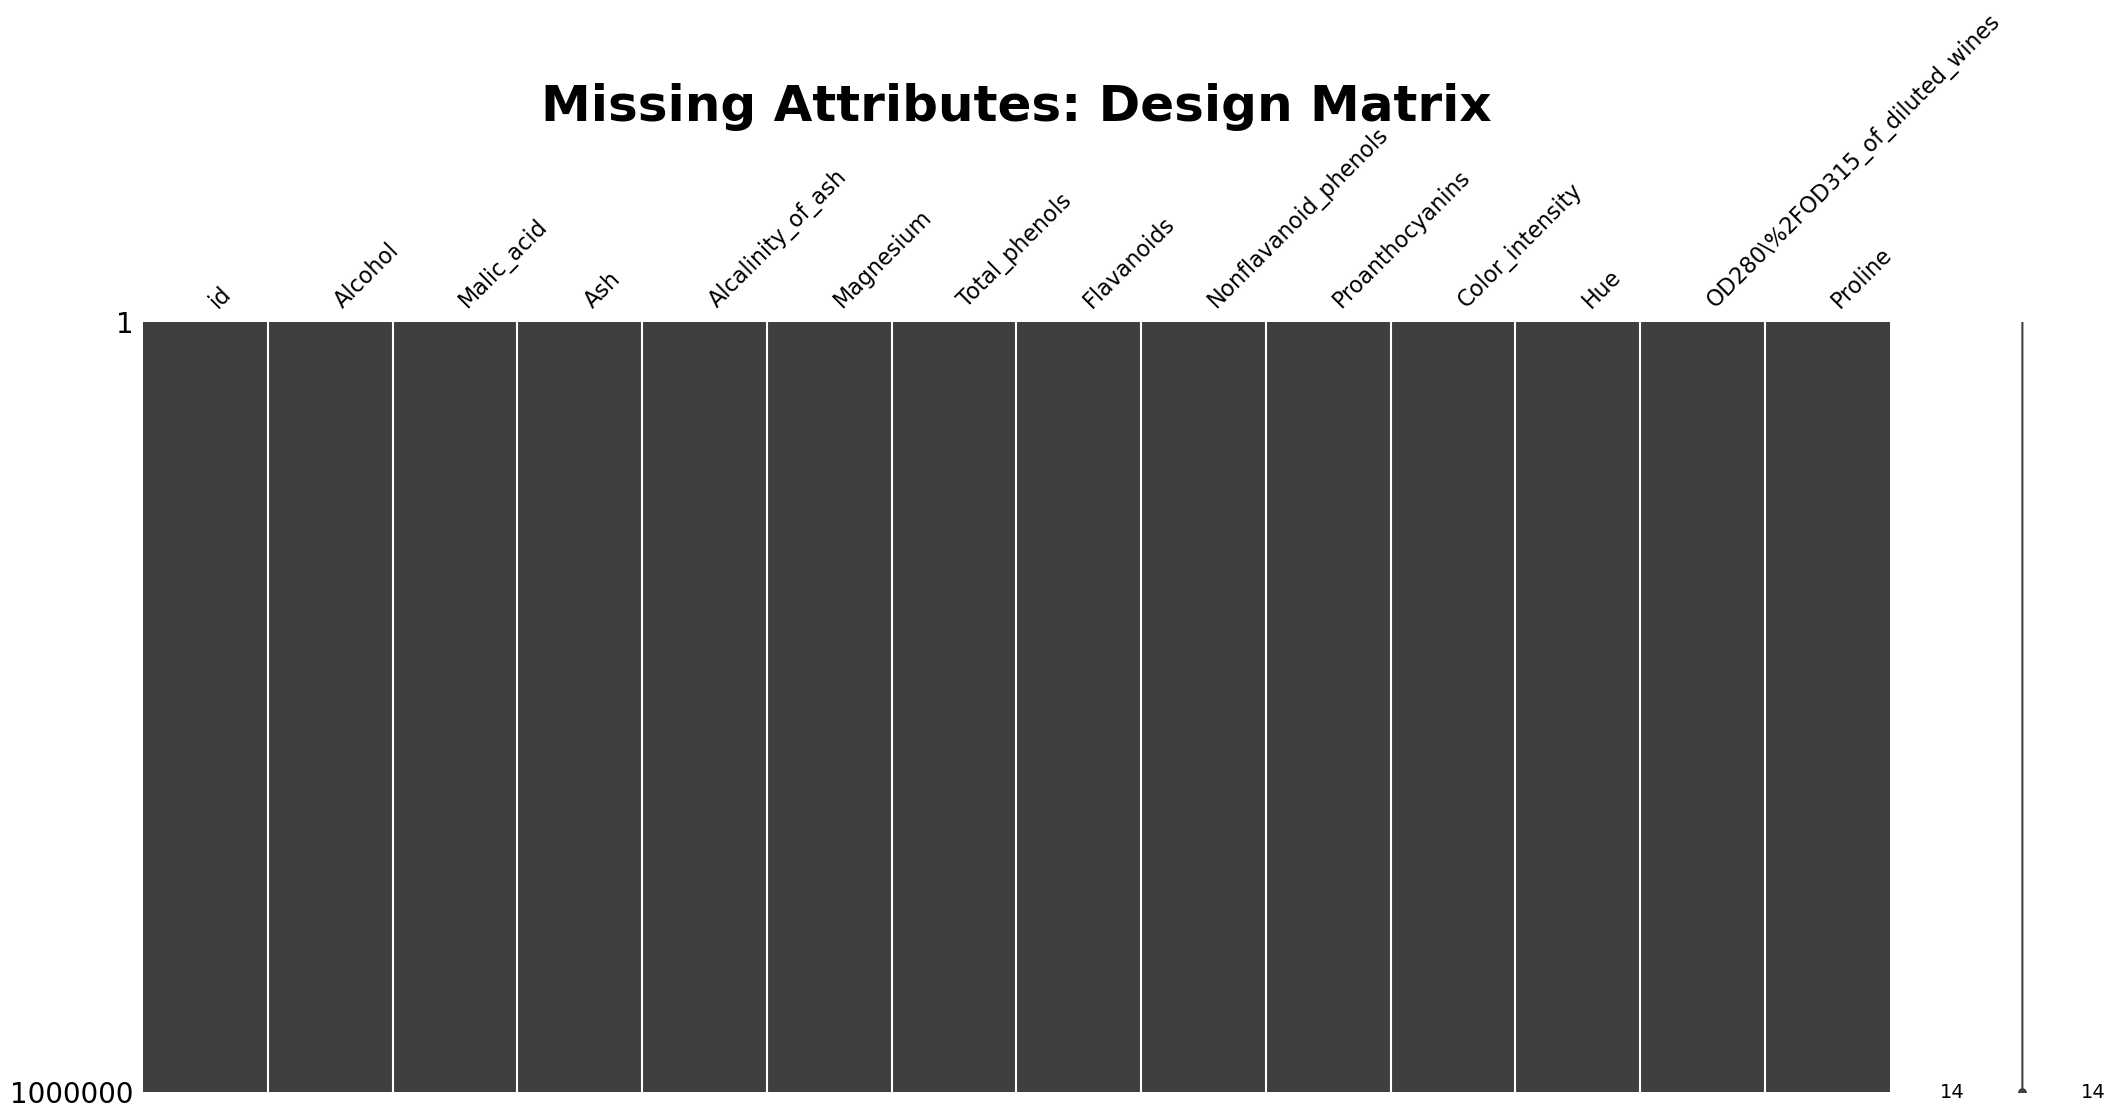

In [55]:
# display missingness visual
msno.matrix(design_df)
plt.title("Missing Attributes: Design Matrix", fontsize = 36, weight = 'bold', y = 1.25);

# save fig
plt.savefig(figs_path + "/missing_attributes_fig_1.png")

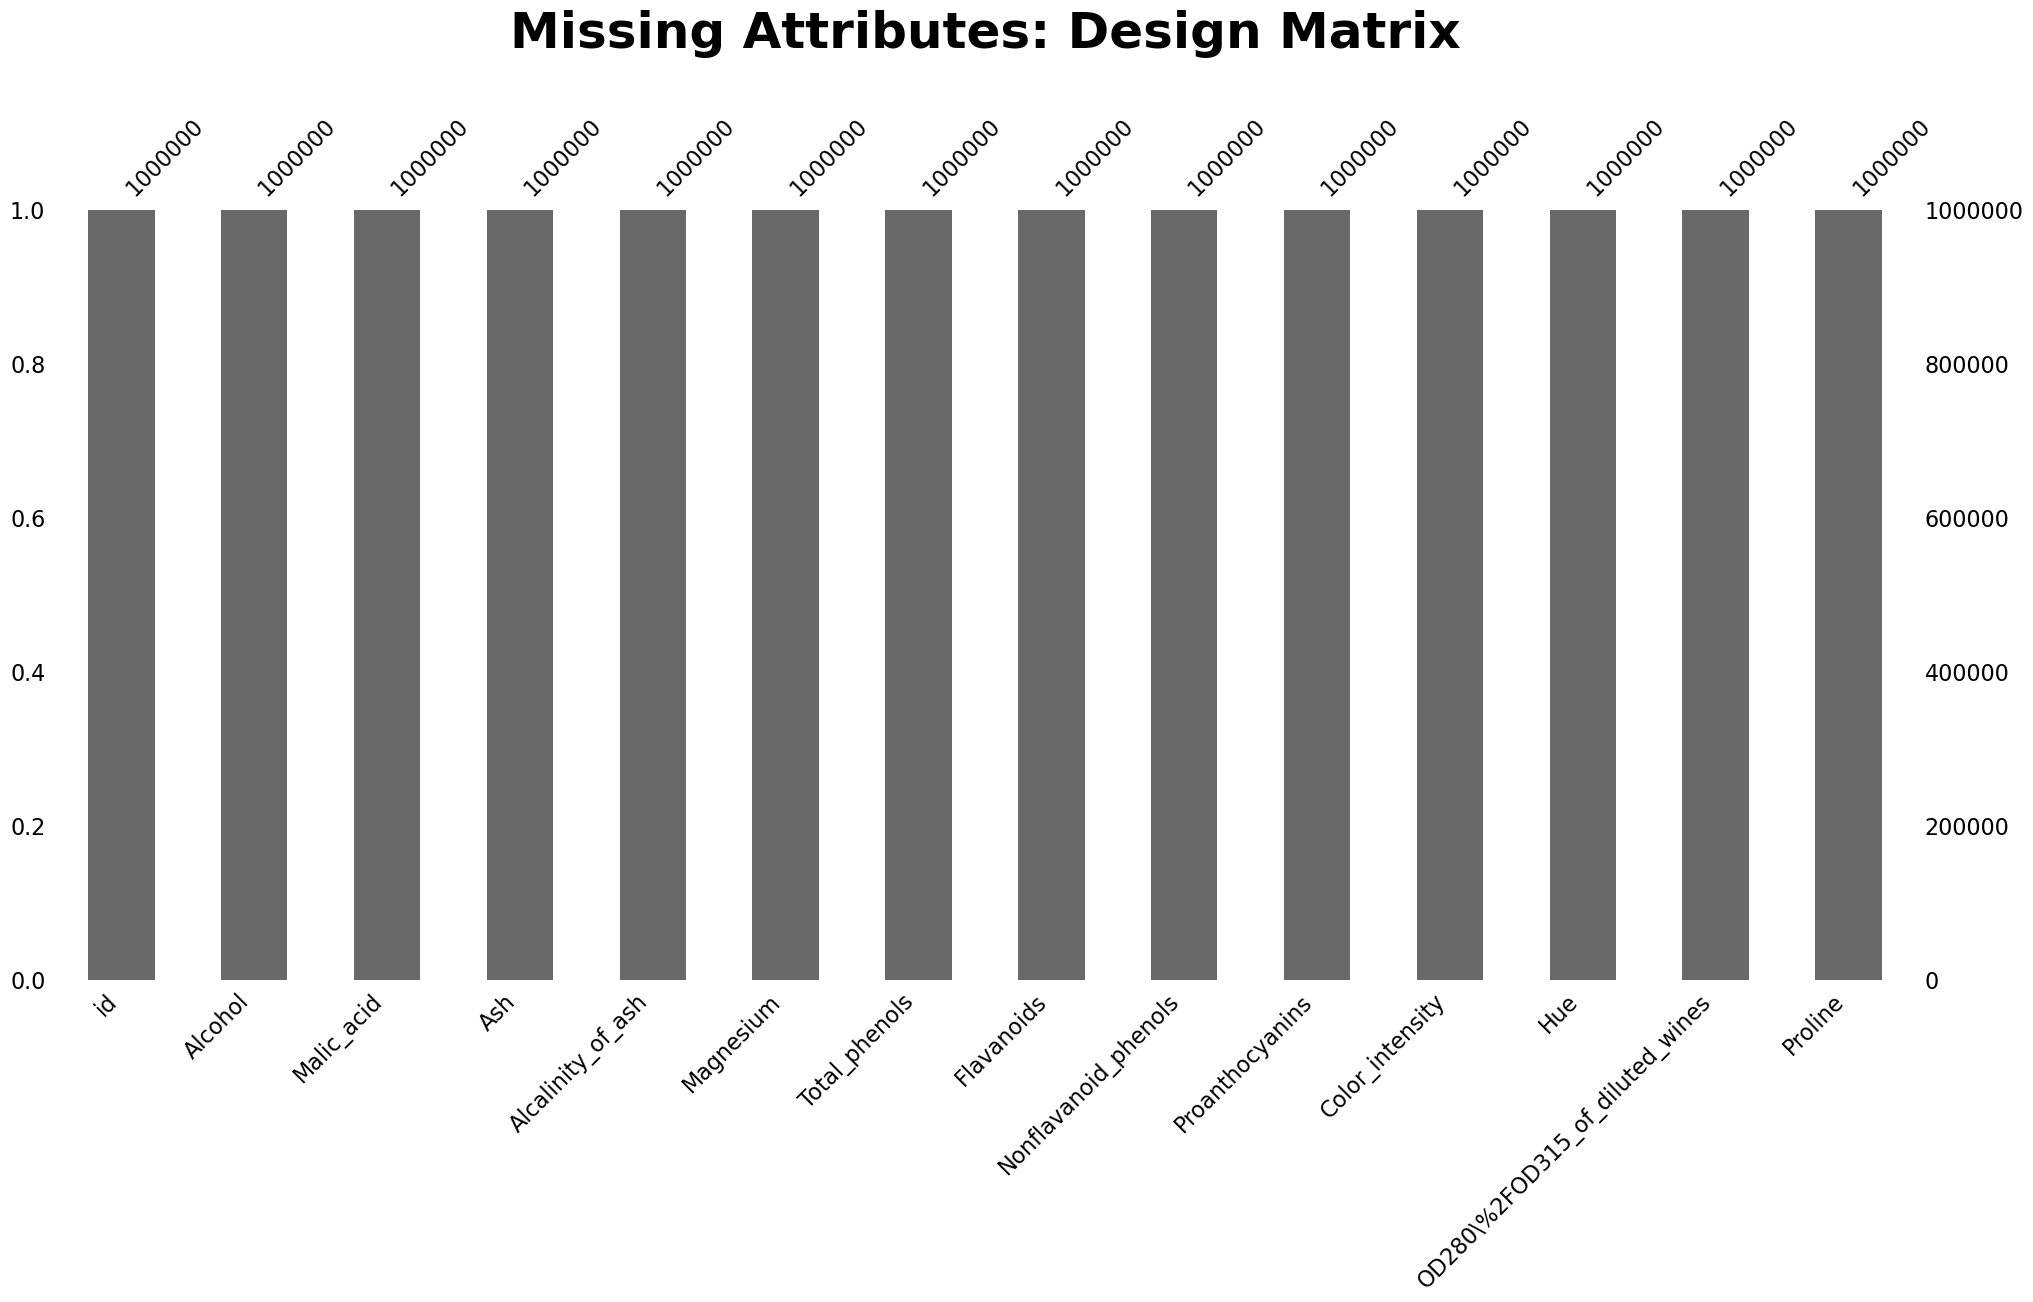

In [56]:
# display missingness visual
msno.bar(design_df)
plt.title("Missing Attributes: Design Matrix", fontsize = 36, weight = 'bold', y = 1.2);

# save fig
plt.savefig(figs_path + "/missing_attributes_fig_2.png")